In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

X_test_t.shape, y_test_t.shape

(torch.Size([150, 20, 4]), torch.Size([150]))

In [4]:
class CrisprCNN(nn.Module):
    def __init__(self):
        super(CrisprCNN, self).__init__()
        self.conv1 = nn.Conv1d(4, 32, 3)
        self.conv2 = nn.Conv1d(32, 64, 3)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64 * 16, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CrisprCNN()

In [6]:
model.load_state_dict(torch.load("crispr_cnn_trained_day6.pth"))
model.eval()

CrisprCNN(
  (conv1): Conv1d(4, 32, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [7]:
with torch.no_grad():
  predictions = model(X_test_t).squeeze().numpy()

In [8]:
predictions.shape

(150,)

In [9]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, mae, r2

(0.11601983578803492, 0.2910800343465805, -0.7310185342927571)

In [10]:
report = f"""
CRISPR guide Efficiency Predictor - Test Set Evaluation
Test MSE: {mse:.6f}
Test MAE: {mae:.6f}
Test R^2: {r2:.6f}
"""

with open("test_evaluation_day7.txt", "w") as f:
    f.write(report)

print("Test evaluation report saved.")

Test evaluation report saved.


In [11]:
results = np.column_stack([y_test, predictions])

np.savetxt(
    "test_predictions_day7.csv",
    results,
    delimiter=",",
    header="true_efficiency,predicted_efficiency",
    comments=""
)

print("Test predictions CSV saved.")

Test predictions CSV saved.


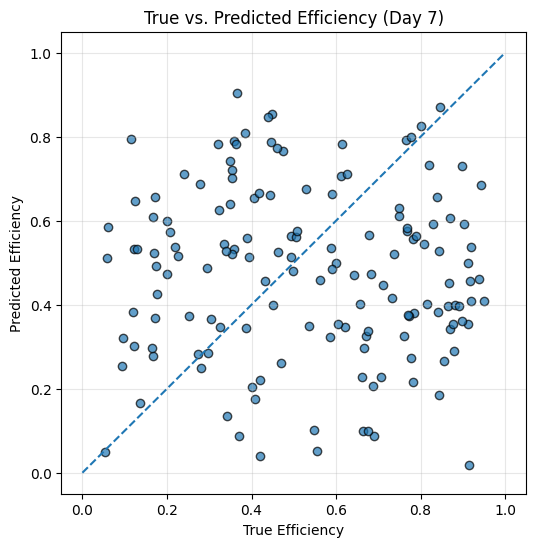

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha=0.7, edgecolor="black")
plt.plot([0,1], [0,1], linestyle="--") #perfect prediction line

plt.xlabel("True Efficiency")
plt.ylabel("Predicted Efficiency")
plt.title("True vs. Predicted Efficiency (Day 7)")
plt.grid(alpha=0.3)

plt.savefig("true_vs_predicted_day7.png", dpi=300)
plt.show()

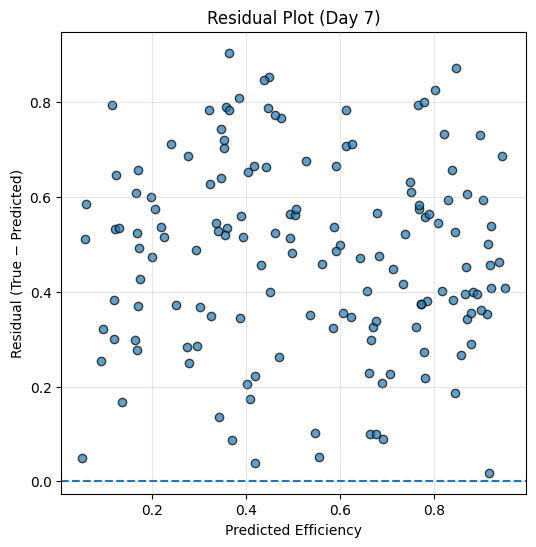

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha = 0.7, edgecolor="black")
plt.axhline(0, linestyle="--")

plt.xlabel("Predicted Efficiency")
plt.ylabel("Residual (True − Predicted)")
plt.title("Residual Plot (Day 7)")
plt.grid(alpha=0.3)

plt.savefig("residual_plot_day7.png", dpi=300)
plt.show()
